<a href="https://colab.research.google.com/github/Bady9898/Clustering/blob/main/Assignment7__Clustering_Crime_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import Neccessary libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering , KMeans , DBSCAN

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [2]:
#import data
crime_data = pd.read_csv("crime_data.csv")
crime_data.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
crime_data1= crime_data.copy()

In [4]:
crime_data.loc[:,'Total'] = crime_data.sum(numeric_only=True, axis=1)
crime_data.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Total
0,Alabama,13.2,236,58,21.2,328.4
1,Alaska,10.0,263,48,44.5,365.5
2,Arizona,8.1,294,80,31.0,413.1
3,Arkansas,8.8,190,50,19.5,268.3
4,California,9.0,276,91,40.6,416.6


In [5]:
crime_data.columns
crime_data.columns = ['City','Murder','Assault','Urbanpop','Rape','Total']

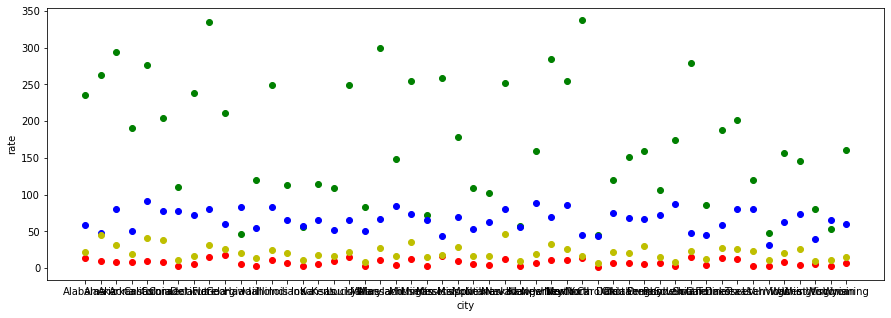

In [6]:
plt.figure(figsize=(15, 5))
plt.scatter(crime_data.City, crime_data.Murder, color='r')
plt.scatter(crime_data.City, crime_data.Assault, color='g')
plt.scatter(crime_data.City, crime_data.Urbanpop, color='b')
plt.scatter(crime_data.City, crime_data.Rape, color='y')
plt.xlabel('city')
plt.ylabel('rate')
plt.show()

In [7]:
crime_data1.shape , crime_data1.dtypes

((50, 5), Unnamed: 0     object
 Murder        float64
 Assault         int64
 UrbanPop        int64
 Rape          float64
 dtype: object)

In [8]:
crime_data1.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [9]:
del crime_data1['Unnamed: 0']
crime_data1.head(5)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime = scaler.fit_transform(crime_data1)
scaled_crime

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

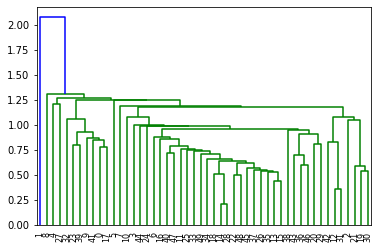

In [11]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(scaled_crime, method='single'))

**optimal number of clusters**

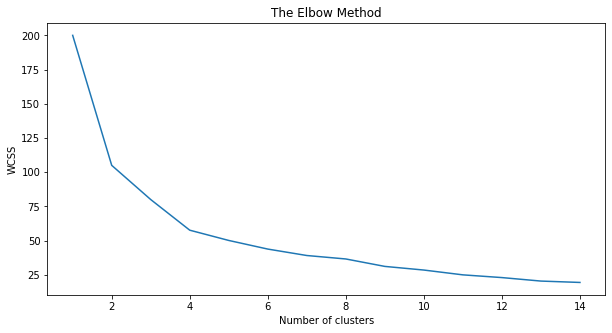

In [12]:
plt.figure(figsize=(10, 5))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i,random_state = 12)
    kmeans.fit(scaled_crime)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**So the optimum no. is 4, because after this point there is no sudden drop in the wcss**

#### 1. Hierarchial clustering

In [13]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')
hc

AgglomerativeClustering(linkage='single', n_clusters=4)

In [14]:
hc.fit_predict(scaled_crime)

array([0, 3, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [15]:
y_hc=hc.fit_predict(scaled_crime)

In [16]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.head(5)

,Clusters
0,0
1,3
2,0
3,0
4,1


In [17]:
crime_data['clusters'] = Clusters
crime_data.head(5)

,City,Murder,Assault,Urbanpop,Rape,Total,clusters
0,Alabama,13.2,236,58,21.2,328.4,0
1,Alaska,10.0,263,48,44.5,365.5,3
2,Arizona,8.1,294,80,31.0,413.1,0
3,Arkansas,8.8,190,50,19.5,268.3,0
4,California,9.0,276,91,40.6,416.6,1


In [18]:
crime_data[crime_data['clusters']==0]

,City,Murder,Assault,Urbanpop,Rape,Total,clusters
0,Alabama,13.2,236,58,21.2,328.4,0
2,Arizona,8.1,294,80,31.0,413.1,0
3,Arkansas,8.8,190,50,19.5,268.3,0
5,Colorado,7.9,204,78,38.7,328.6,0
6,Connecticut,3.3,110,77,11.1,201.4,0
7,Delaware,5.9,238,72,15.8,331.7,0
9,Georgia,17.4,211,60,25.8,314.2,0
10,Hawaii,5.3,46,83,20.2,154.5,0
11,Idaho,2.6,120,54,14.2,190.8,0
12,Illinois,10.4,249,83,24.0,366.4,0


In [19]:
crime_data[crime_data['clusters']==1]

,City,Murder,Assault,Urbanpop,Rape,Total,clusters
4,California,9.0,276,91,40.6,416.6,1
27,Nevada,12.2,252,81,46.0,391.2,1


In [20]:
crime_data[crime_data['clusters']==2]

,City,Murder,Assault,Urbanpop,Rape,Total,clusters
8,Florida,15.4,335,80,31.9,462.3,2


In [21]:
crime_data[crime_data['clusters']==3]

,City,Murder,Assault,Urbanpop,Rape,Total,clusters
1,Alaska,10.0,263,48,44.5,365.5,3


In [22]:
stats = crime_data.sort_values("Total", ascending=False)
crime_data_total= pd.DataFrame(stats)
crime_data_total.head()

,City,Murder,Assault,Urbanpop,Rape,Total,clusters
8,Florida,15.4,335,80,31.9,462.3,2
4,California,9.0,276,91,40.6,416.6,1
2,Arizona,8.1,294,80,31.0,413.1,0
32,North Carolina,13.0,337,45,16.1,411.1,0
19,Maryland,11.3,300,67,27.8,406.1,0


**=====================================================================================================================**
# **KMEAN CLUSTERING**

In [23]:
KMean = KMeans(n_clusters=4, max_iter=600, algorithm = 'auto',init="k-means++")

In [24]:
y_kmean=KMean.fit_predict(scaled_crime)
y_kmean

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [25]:
KMean.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

In [26]:
Cluster_kmean=pd.DataFrame(y_kmean,columns=['Clusters'])
Cluster_kmean.head(5)

,Clusters
0,3
1,1
2,1
3,3
4,1


In [27]:
crime_data['clusters_kmean'] = Cluster_kmean
crime_data.head(5)

,City,Murder,Assault,Urbanpop,Rape,Total,clusters,clusters_kmean
0,Alabama,13.2,236,58,21.2,328.4,0,3
1,Alaska,10.0,263,48,44.5,365.5,3,1
2,Arizona,8.1,294,80,31.0,413.1,0,1
3,Arkansas,8.8,190,50,19.5,268.3,0,3
4,California,9.0,276,91,40.6,416.6,1,1


In [28]:
crime_data[crime_data['clusters_kmean']==0]

,City,Murder,Assault,Urbanpop,Rape,Total,clusters,clusters_kmean
6,Connecticut,3.3,110,77,11.1,201.4,0,0
7,Delaware,5.9,238,72,15.8,331.7,0,0
10,Hawaii,5.3,46,83,20.2,154.5,0,0
13,Indiana,7.2,113,65,21.0,206.2,0,0
15,Kansas,6.0,115,66,18.0,205.0,0,0
20,Massachusetts,4.4,149,85,16.3,254.7,0,0
29,New Jersey,7.4,159,89,18.8,274.2,0,0
34,Ohio,7.3,120,75,21.4,223.7,0,0
35,Oklahoma,6.6,151,68,20.0,245.6,0,0
36,Oregon,4.9,159,67,29.3,260.2,0,0


In [29]:
crime_data[crime_data['clusters_kmean']==1]

,City,Murder,Assault,Urbanpop,Rape,Total,clusters,clusters_kmean
1,Alaska,10.0,263,48,44.5,365.5,3,1
2,Arizona,8.1,294,80,31.0,413.1,0,1
4,California,9.0,276,91,40.6,416.6,1,1
5,Colorado,7.9,204,78,38.7,328.6,0,1
8,Florida,15.4,335,80,31.9,462.3,2,1
12,Illinois,10.4,249,83,24.0,366.4,0,1
19,Maryland,11.3,300,67,27.8,406.1,0,1
21,Michigan,12.1,255,74,35.1,376.2,0,1
24,Missouri,9.0,178,70,28.2,285.2,0,1
27,Nevada,12.2,252,81,46.0,391.2,1,1


In [30]:
crime_data[crime_data['clusters_kmean']==2]

,City,Murder,Assault,Urbanpop,Rape,Total,clusters,clusters_kmean
11,Idaho,2.6,120,54,14.2,190.8,0,2
14,Iowa,2.2,56,57,11.3,126.5,0,2
16,Kentucky,9.7,109,52,16.3,187.0,0,2
18,Maine,2.1,83,51,7.8,143.9,0,2
22,Minnesota,2.7,72,66,14.9,155.6,0,2
25,Montana,6.0,109,53,16.4,184.4,0,2
26,Nebraska,4.3,102,62,16.5,184.8,0,2
28,New Hampshire,2.1,57,56,9.5,124.6,0,2
33,North Dakota,0.8,45,44,7.3,97.1,0,2
40,South Dakota,3.8,86,45,12.8,147.6,0,2


In [31]:
crime_data[crime_data['clusters_kmean']==3]

,City,Murder,Assault,Urbanpop,Rape,Total,clusters,clusters_kmean
0,Alabama,13.2,236,58,21.2,328.4,0,3
3,Arkansas,8.8,190,50,19.5,268.3,0,3
9,Georgia,17.4,211,60,25.8,314.2,0,3
17,Louisiana,15.4,249,66,22.2,352.6,0,3
23,Mississippi,16.1,259,44,17.1,336.2,0,3
32,North Carolina,13.0,337,45,16.1,411.1,0,3
39,South Carolina,14.4,279,48,22.5,363.9,0,3
41,Tennessee,13.2,188,59,26.9,287.1,0,3


## **DBSCAN CLUSTERING**

In [32]:
dbs=DBSCAN(min_samples=4,eps=1)
cluster_dbs=dbs.fit_predict(scaled_crime)

In [33]:
cluster_dbs

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [34]:
crime_data["cluster_dbs"]=cluster_dbs
crime_data.head()

,City,Murder,Assault,Urbanpop,Rape,Total,clusters,clusters_kmean,cluster_dbs
0,Alabama,13.2,236,58,21.2,328.4,0,3,0
1,Alaska,10.0,263,48,44.5,365.5,3,1,-1
2,Arizona,8.1,294,80,31.0,413.1,0,1,-1
3,Arkansas,8.8,190,50,19.5,268.3,0,3,-1
4,California,9.0,276,91,40.6,416.6,1,1,-1


In [35]:
#crime_data["cluster_dbs"]=cluster_dbs
crime2=crime_data.drop(labels=['clusters','clusters_kmean'],axis=1)
crime2.head()

,City,Murder,Assault,Urbanpop,Rape,Total,cluster_dbs
0,Alabama,13.2,236,58,21.2,328.4,0
1,Alaska,10.0,263,48,44.5,365.5,-1
2,Arizona,8.1,294,80,31.0,413.1,-1
3,Arkansas,8.8,190,50,19.5,268.3,-1
4,California,9.0,276,91,40.6,416.6,-1


In [36]:
crime2.groupby('cluster_dbs').agg(['mean']).reset_index()

,cluster_dbs,Murder,Assault,Urbanpop,Rape,Total
,,mean,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667,357.605556
1,0,14.050000,238.000000,57.750000,23.200000,333.000000
2,1,4.825000,112.035714,63.357143,16.107143,196.325000


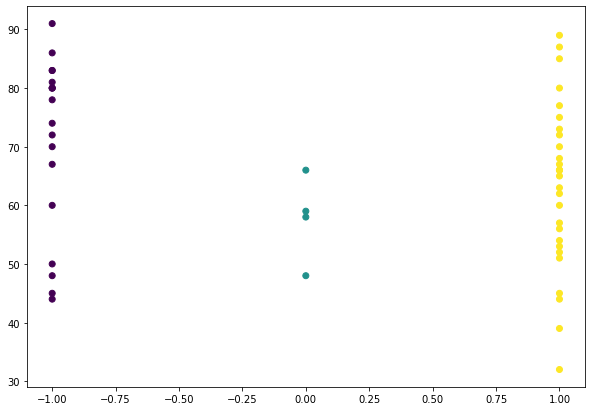

In [40]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime2['cluster_dbs'],crime2['Urbanpop'], c=cluster_dbs) 